C:\Users\user\AppData\Local\Temp\ipykernel_26684\2778026442.py:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cds = df['CDS_Spread'].fillna(method='ffill')  # điền NaN nếu có


CDS hiện tại: 58.90 bps
Lợi suất trung bình năm: 3.62%
Biến động năm: 61.48%
Hệ số stress: 0.80x → Biến động stress: 49.18%

=== KẾT QUẢ STRESS TEST CDS (10 ngày tới) ===
CDS trung bình dự báo: 59.47 bps
CDS cao nhất: 189.09 bps
VaR 95%: 28.84 bps
VaR 99%: 45.63 bps
CVaR 99%: 55.17 bps
Xác suất CDS ≥ 200 bps: 0.0%
Xác suất CDS ≥ 300 bps: 0.0%


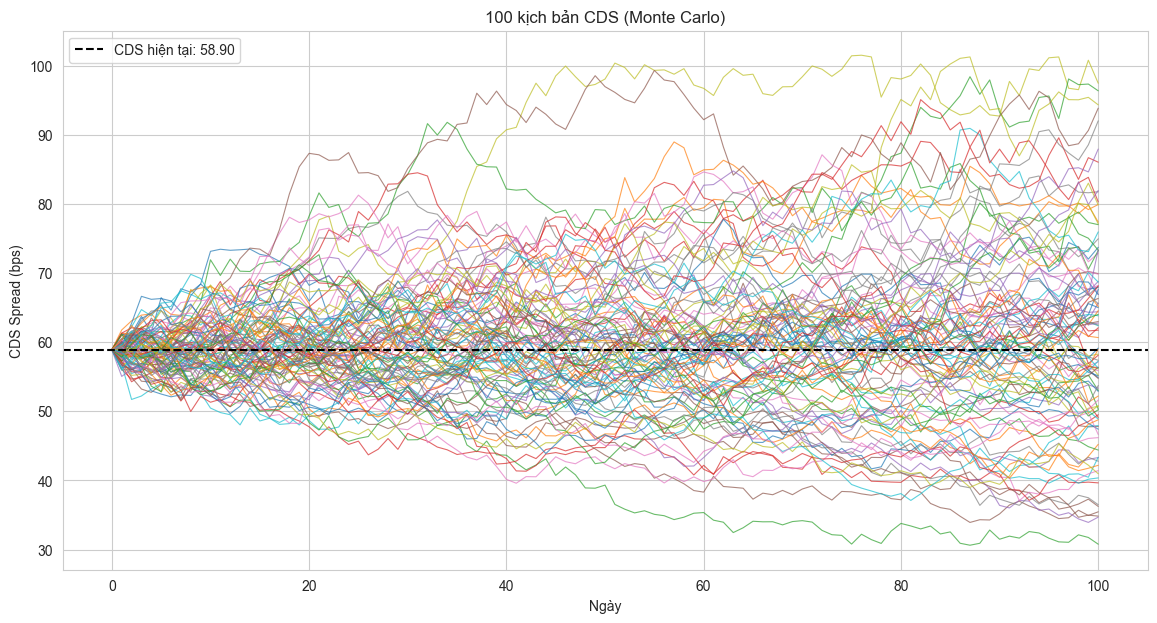

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

# Load dữ liệu
try:
    df = pd.read_csv("tmhbk_2_filled.csv", parse_dates=['DATE'], index_col='DATE')
except FileNotFoundError:
    raise FileNotFoundError("❌ Không tìm thấy file 'tmhbk_2_filled.csv'. Hãy kiểm tra lại.")

df = df.sort_index()

# Lọc dữ liệu từ 01/01/2018 đến 31/12/2021
start_date = '2018-01-01'
end_date = '2021-12-31'
df = df.loc[start_date:end_date]

# Kiểm tra CDS_Spread tồn tại
if 'CDS_Spread' not in df.columns:
    raise ValueError("❌ Cột 'CDS_Spread' không tồn tại trong dữ liệu.")
    
cds = df['CDS_Spread'].fillna(method='ffill')  # điền NaN nếu có
cds_return = np.log(cds / cds.shift(1))  # tính log return hàng ngày

CDS0 = cds.iloc[-1]                  # CDS hiện tại
mu_daily = cds_return.mean()
sigma_daily = cds_return.std()

# Annualize
mu_annual = mu_daily * 365
sigma_annual = sigma_daily * np.sqrt(365)

print(f"CDS hiện tại: {CDS0:.2f} bps")
print(f"Lợi suất trung bình năm: {mu_annual:.2%}")
print(f"Biến động năm: {sigma_annual:.2%}")

current_vix = df['VIX'].iloc[-1]
current_cds = CDS0

stress_factor = 1.0 + 0.3 * (current_cds - df['CDS_Spread'].mean()) / df['CDS_Spread'].mean() \
                      + 0.5 * (current_vix - df['VIX'].mean()) / df['VIX'].mean()
stress_factor = 0.8  # tối thiểu tăng 20%
sigma_stress = sigma_annual * stress_factor

print(f"Hệ số stress: {stress_factor:.2f}x → Biến động stress: {sigma_stress:.2%}")


T = 100 / 365      # 10 ngày giao dịch
N = 100            # mỗi bước 1 ngày
num_sim = 100000    # số kịch bản
dt = T / N

simulations = np.zeros((num_sim, N + 1))
simulations[:, 0] = CDS0

np.random.seed(42)
for i in range(1, N + 1):
    z = np.random.standard_normal(num_sim)
    simulations[:, i] = simulations[:, i-1] * np.exp(
        (mu_annual - 0.5 * sigma_stress**2) * dt + sigma_stress * np.sqrt(dt) * z
    )

CDS_T = simulations[:, -1]


losses = CDS_T - CDS0

var_95 = np.percentile(losses, 95)
var_99 = np.percentile(losses, 99)
cvar_99 = losses[losses >= var_99].mean()
worst_cds = CDS_T.max()
best_cds = CDS_T.min()
prob_over_200bps = np.mean(CDS_T >= 200) * 100
prob_over_300bps = np.mean(CDS_T >= 300) * 100

print(f"\n=== KẾT QUẢ STRESS TEST CDS (10 ngày tới) ===")
print(f"CDS trung bình dự báo: {CDS_T.mean():.2f} bps")
print(f"CDS cao nhất: {worst_cds:.2f} bps")
print(f"VaR 95%: {var_95:.2f} bps")
print(f"VaR 99%: {var_99:.2f} bps")
print(f"CVaR 99%: {cvar_99:.2f} bps")
print(f"Xác suất CDS ≥ 200 bps: {prob_over_200bps:.1f}%")
print(f"Xác suất CDS ≥ 300 bps: {prob_over_300bps:.1f}%")


plt.figure(figsize=(14, 7))
for i in range(100):
    plt.plot(simulations[i, :], lw=0.8, alpha=0.7)
plt.title('100 kịch bản CDS (Monte Carlo)')
plt.xlabel('Ngày')
plt.ylabel('CDS Spread (bps)')
plt.axhline(y=CDS0, color='black', linestyle='--', label=f'CDS hiện tại: {CDS0:.2f}')
plt.legend()
plt.savefig("kichban1.png")
plt.show()







C:\Users\user\AppData\Local\Temp\ipykernel_26684\3280753620.py:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cds = df['CDS_Spread'].fillna(method='ffill')  # điền NaN nếu có


CDS hiện tại: 58.90 bps
Lợi suất trung bình năm: 3.62%
Biến động năm: 61.48%
Hệ số stress: 1.05x → Biến động stress: 64.55%

=== KẾT QUẢ STRESS TEST CDS (10 ngày tới) ===
CDS trung bình dự báo: 59.46 bps
CDS cao nhất: 267.73 bps
VaR 95%: 38.83 bps
VaR 99%: 64.08 bps
CVaR 99%: 79.21 bps
Xác suất CDS ≥ 200 bps: 0.0%
Xác suất CDS ≥ 300 bps: 0.0%


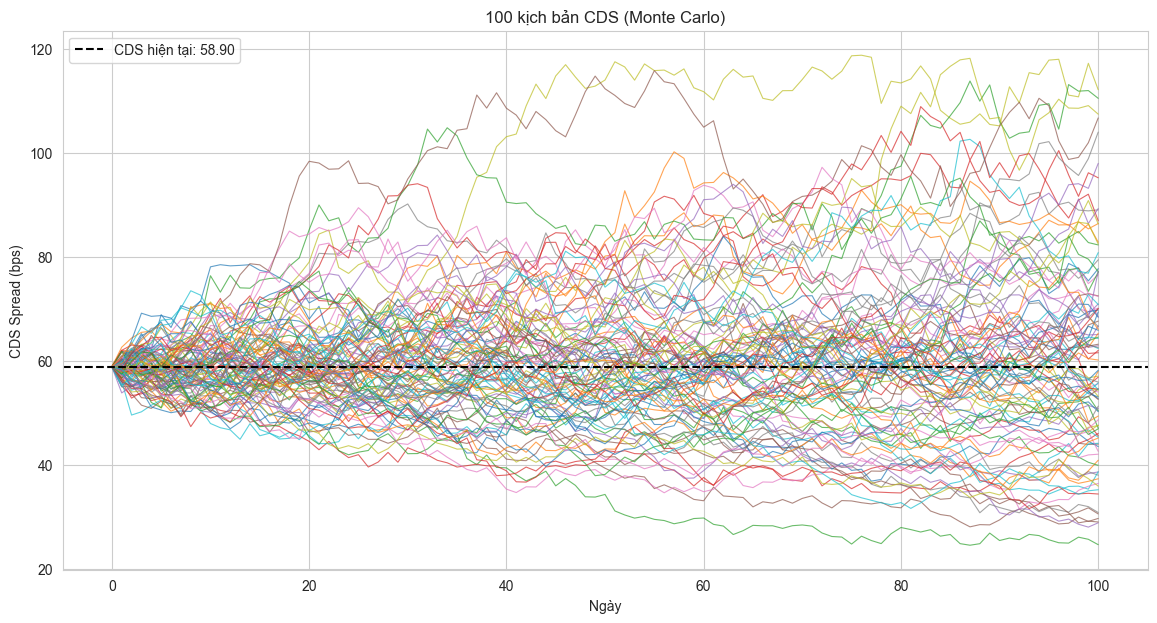

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

# Load dữ liệu
try:
    df = pd.read_csv("tmhbk_2_filled.csv", parse_dates=['DATE'], index_col='DATE')
except FileNotFoundError:
    raise FileNotFoundError("❌ Không tìm thấy file 'tmhbk_2_filled.csv'. Hãy kiểm tra lại.")

df = df.sort_index()

# Lọc dữ liệu từ 01/01/2018 đến 31/12/2021
start_date = '2018-01-01'
end_date = '2021-12-31'
df = df.loc[start_date:end_date]

# Kiểm tra CDS_Spread tồn tại
if 'CDS_Spread' not in df.columns:
    raise ValueError("❌ Cột 'CDS_Spread' không tồn tại trong dữ liệu.")
    
cds = df['CDS_Spread'].fillna(method='ffill')  # điền NaN nếu có
cds_return = np.log(cds / cds.shift(1))  # tính log return hàng ngày

CDS0 = cds.iloc[-1]                  # CDS hiện tại
mu_daily = cds_return.mean()
sigma_daily = cds_return.std()

# Annualize
mu_annual = mu_daily * 365
sigma_annual = sigma_daily * np.sqrt(365)

print(f"CDS hiện tại: {CDS0:.2f} bps")
print(f"Lợi suất trung bình năm: {mu_annual:.2%}")
print(f"Biến động năm: {sigma_annual:.2%}")

current_vix = df['VIX'].iloc[-1]
current_cds = CDS0

stress_factor = 1.0 + 0.3 * (current_cds - df['CDS_Spread'].mean()) / df['CDS_Spread'].mean() \
                      + 0.5 * (current_vix - df['VIX'].mean()) / df['VIX'].mean()
stress_factor = 1.05  # tối thiểu tăng 20%
sigma_stress = sigma_annual * stress_factor

print(f"Hệ số stress: {stress_factor:.2f}x → Biến động stress: {sigma_stress:.2%}")


T = 100 / 365      # 10 ngày giao dịch
N = 100            # mỗi bước 1 ngày
num_sim = 100000    # số kịch bản
dt = T / N

simulations = np.zeros((num_sim, N + 1))
simulations[:, 0] = CDS0

np.random.seed(42)
for i in range(1, N + 1):
    z = np.random.standard_normal(num_sim)
    simulations[:, i] = simulations[:, i-1] * np.exp(
        (mu_annual - 0.5 * sigma_stress**2) * dt + sigma_stress * np.sqrt(dt) * z
    )

CDS_T = simulations[:, -1]


losses = CDS_T - CDS0

var_95 = np.percentile(losses, 95)
var_99 = np.percentile(losses, 99)
cvar_99 = losses[losses >= var_99].mean()
worst_cds = CDS_T.max()
best_cds = CDS_T.min()
prob_over_200bps = np.mean(CDS_T >= 200) * 100
prob_over_300bps = np.mean(CDS_T >= 300) * 100

print(f"\n=== KẾT QUẢ STRESS TEST CDS (10 ngày tới) ===")
print(f"CDS trung bình dự báo: {CDS_T.mean():.2f} bps")
print(f"CDS cao nhất: {worst_cds:.2f} bps")
print(f"VaR 95%: {var_95:.2f} bps")
print(f"VaR 99%: {var_99:.2f} bps")
print(f"CVaR 99%: {cvar_99:.2f} bps")
print(f"Xác suất CDS ≥ 200 bps: {prob_over_200bps:.1f}%")
print(f"Xác suất CDS ≥ 300 bps: {prob_over_300bps:.1f}%")


plt.figure(figsize=(14, 7))
for i in range(100):
    plt.plot(simulations[i, :], lw=0.8, alpha=0.7)
plt.title('100 kịch bản CDS (Monte Carlo)')
plt.xlabel('Ngày')
plt.ylabel('CDS Spread (bps)')
plt.axhline(y=CDS0, color='black', linestyle='--', label=f'CDS hiện tại: {CDS0:.2f}')
plt.legend()
plt.savefig("kichban2.png")
plt.show()







C:\Users\user\AppData\Local\Temp\ipykernel_26684\318921276.py:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cds = df['CDS_Spread'].fillna(method='ffill')  # điền NaN nếu có


CDS hiện tại: 58.90 bps
Lợi suất trung bình năm: 3.62%
Biến động năm: 61.48%
Hệ số stress: 1.35x → Biến động stress: 82.99%

=== KẾT QUẢ STRESS TEST CDS (10 ngày tới) ===
CDS trung bình dự báo: 59.44 bps
CDS cao nhất: 402.95 bps
VaR 95%: 51.39 bps
VaR 99%: 89.30 bps
CVaR 99%: 113.52 bps
Xác suất CDS ≥ 200 bps: 0.1%
Xác suất CDS ≥ 300 bps: 0.0%


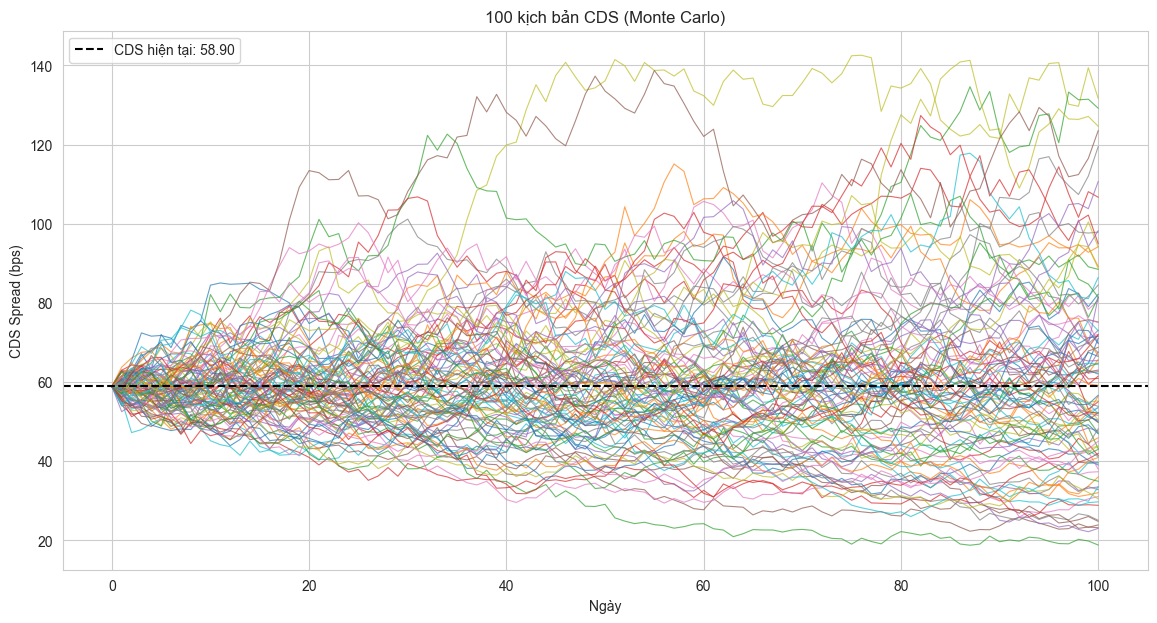

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

# Load dữ liệu
try:
    df = pd.read_csv("tmhbk_2_filled.csv", parse_dates=['DATE'], index_col='DATE')
except FileNotFoundError:
    raise FileNotFoundError("❌ Không tìm thấy file 'tmhbk_2_filled.csv'. Hãy kiểm tra lại.")

df = df.sort_index()

# Lọc dữ liệu từ 01/01/2018 đến 31/12/2021
start_date = '2018-01-01'
end_date = '2021-12-31'
df = df.loc[start_date:end_date]

# Kiểm tra CDS_Spread tồn tại
if 'CDS_Spread' not in df.columns:
    raise ValueError("❌ Cột 'CDS_Spread' không tồn tại trong dữ liệu.")

cds = df['CDS_Spread'].fillna(method='ffill')  # điền NaN nếu có
cds_return = np.log(cds / cds.shift(1))  # tính log return hàng ngày

CDS0 = cds.iloc[-1]  # CDS hiện tại
mu_daily = cds_return.mean()
sigma_daily = cds_return.std()

# Annualize
mu_annual = mu_daily * 365
sigma_annual = sigma_daily * np.sqrt(365)

print(f"CDS hiện tại: {CDS0:.2f} bps")
print(f"Lợi suất trung bình năm: {mu_annual:.2%}")
print(f"Biến động năm: {sigma_annual:.2%}")

current_vix = df['VIX'].iloc[-1]
current_cds = CDS0

stress_factor = 1.0 + 0.3 * (current_cds - df['CDS_Spread'].mean()) / df['CDS_Spread'].mean() \
                + 0.5 * (current_vix - df['VIX'].mean()) / df['VIX'].mean()
stress_factor = 1.35  # tối thiểu tăng 20%
sigma_stress = sigma_annual * stress_factor

print(f"Hệ số stress: {stress_factor:.2f}x → Biến động stress: {sigma_stress:.2%}")

T = 100 / 365  # 10 ngày giao dịch
N = 100  # mỗi bước 1 ngày
num_sim = 100000  # số kịch bản
dt = T / N

simulations = np.zeros((num_sim, N + 1))
simulations[:, 0] = CDS0

np.random.seed(42)
for i in range(1, N + 1):
    z = np.random.standard_normal(num_sim)
    simulations[:, i] = simulations[:, i - 1] * np.exp(
        (mu_annual - 0.5 * sigma_stress ** 2) * dt + sigma_stress * np.sqrt(dt) * z
    )

CDS_T = simulations[:, -1]

losses = CDS_T - CDS0

var_95 = np.percentile(losses, 95)
var_99 = np.percentile(losses, 99)
cvar_99 = losses[losses >= var_99].mean()
worst_cds = CDS_T.max()
best_cds = CDS_T.min()
prob_over_200bps = np.mean(CDS_T >= 200) * 100
prob_over_300bps = np.mean(CDS_T >= 300) * 100

print(f"\n=== KẾT QUẢ STRESS TEST CDS (10 ngày tới) ===")
print(f"CDS trung bình dự báo: {CDS_T.mean():.2f} bps")
print(f"CDS cao nhất: {worst_cds:.2f} bps")
print(f"VaR 95%: {var_95:.2f} bps")
print(f"VaR 99%: {var_99:.2f} bps")
print(f"CVaR 99%: {cvar_99:.2f} bps")
print(f"Xác suất CDS ≥ 200 bps: {prob_over_200bps:.1f}%")
print(f"Xác suất CDS ≥ 300 bps: {prob_over_300bps:.1f}%")

plt.figure(figsize=(14, 7))
for i in range(100):
    plt.plot(simulations[i, :], lw=0.8, alpha=0.7)
plt.title('100 kịch bản CDS (Monte Carlo)')
plt.xlabel('Ngày')
plt.ylabel('CDS Spread (bps)')
plt.axhline(y=CDS0, color='black', linestyle='--', label=f'CDS hiện tại: {CDS0:.2f}')
plt.legend()
plt.savefig("kichban3.png")
plt.show()







C:\Users\user\AppData\Local\Temp\ipykernel_26684\4093917113.py:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cds = df['CDS_Spread'].fillna(method='ffill')  # điền NaN nếu có


CDS hiện tại: 58.90 bps
Lợi suất trung bình năm: 3.62%
Biến động năm: 61.48%
Hệ số stress: 2.00x → Biến động stress: 122.95%

=== KẾT QUẢ STRESS TEST CDS (10 ngày tới) ===
CDS trung bình dự báo: 59.39 bps
CDS cao nhất: 946.33 bps
VaR 95%: 79.89 bps
VaR 99%: 156.12 bps
CVaR 99%: 212.15 bps
Xác suất CDS ≥ 200 bps: 1.3%
Xác suất CDS ≥ 300 bps: 0.2%


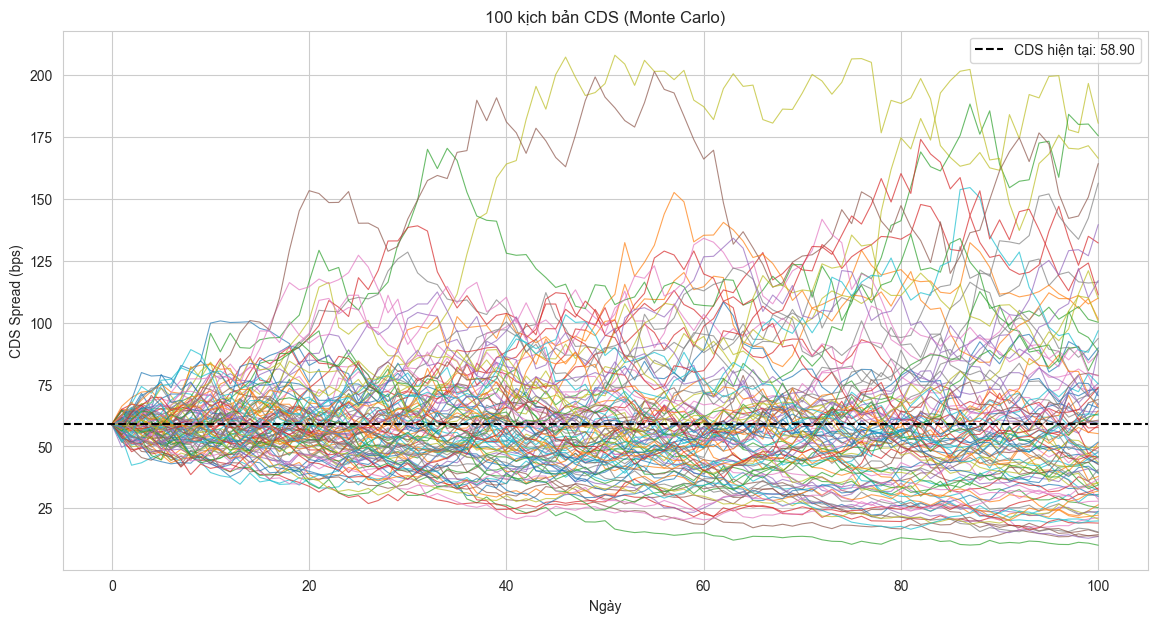

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

# Load dữ liệu
try:
    df = pd.read_csv("tmhbk_2_filled.csv", parse_dates=['DATE'], index_col='DATE')
except FileNotFoundError:
    raise FileNotFoundError("❌ Không tìm thấy file 'tmhbk_2_filled.csv'. Hãy kiểm tra lại.")

df = df.sort_index()

# Lọc dữ liệu từ 01/01/2018 đến 31/12/2021
start_date = '2018-01-01'
end_date = '2021-12-31'
df = df.loc[start_date:end_date]

# Kiểm tra CDS_Spread tồn tại
if 'CDS_Spread' not in df.columns:
    raise ValueError("❌ Cột 'CDS_Spread' không tồn tại trong dữ liệu.")

cds = df['CDS_Spread'].fillna(method='ffill')  # điền NaN nếu có
cds_return = np.log(cds / cds.shift(1))  # tính log return hàng ngày

CDS0 = cds.iloc[-1]  # CDS hiện tại
mu_daily = cds_return.mean()
sigma_daily = cds_return.std()

# Annualize
mu_annual = mu_daily * 365
sigma_annual = sigma_daily * np.sqrt(365)

print(f"CDS hiện tại: {CDS0:.2f} bps")
print(f"Lợi suất trung bình năm: {mu_annual:.2%}")
print(f"Biến động năm: {sigma_annual:.2%}")

current_vix = df['VIX'].iloc[-1]
current_cds = CDS0

stress_factor = 1.0 + 0.3 * (current_cds - df['CDS_Spread'].mean()) / df['CDS_Spread'].mean() \
                + 0.5 * (current_vix - df['VIX'].mean()) / df['VIX'].mean()
stress_factor = 2  # tối thiểu tăng 20%
sigma_stress = sigma_annual * stress_factor

print(f"Hệ số stress: {stress_factor:.2f}x → Biến động stress: {sigma_stress:.2%}")

T = 100 / 365  # 10 ngày giao dịch
N = 100  # mỗi bước 1 ngày
num_sim = 100000  # số kịch bản
dt = T / N

simulations = np.zeros((num_sim, N + 1))
simulations[:, 0] = CDS0

np.random.seed(42)
for i in range(1, N + 1):
    z = np.random.standard_normal(num_sim)
    simulations[:, i] = simulations[:, i - 1] * np.exp(
        (mu_annual - 0.5 * sigma_stress ** 2) * dt + sigma_stress * np.sqrt(dt) * z
    )

CDS_T = simulations[:, -1]

losses = CDS_T - CDS0

var_95 = np.percentile(losses, 95)
var_99 = np.percentile(losses, 99)
cvar_99 = losses[losses >= var_99].mean()
worst_cds = CDS_T.max()
best_cds = CDS_T.min()
prob_over_200bps = np.mean(CDS_T >= 200) * 100
prob_over_300bps = np.mean(CDS_T >= 300) * 100

print(f"\n=== KẾT QUẢ STRESS TEST CDS (10 ngày tới) ===")
print(f"CDS trung bình dự báo: {CDS_T.mean():.2f} bps")
print(f"CDS cao nhất: {worst_cds:.2f} bps")
print(f"VaR 95%: {var_95:.2f} bps")
print(f"VaR 99%: {var_99:.2f} bps")
print(f"CVaR 99%: {cvar_99:.2f} bps")
print(f"Xác suất CDS ≥ 200 bps: {prob_over_200bps:.1f}%")
print(f"Xác suất CDS ≥ 300 bps: {prob_over_300bps:.1f}%")

plt.figure(figsize=(14, 7))
for i in range(100):
    plt.plot(simulations[i, :], lw=0.8, alpha=0.7)
plt.title('100 kịch bản CDS (Monte Carlo)')
plt.xlabel('Ngày')
plt.ylabel('CDS Spread (bps)')
plt.axhline(y=CDS0, color='black', linestyle='--', label=f'CDS hiện tại: {CDS0:.2f}')
plt.legend()
plt.savefig("kichban4.png")
plt.show()





